In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

In [12]:
test_image = cv2.imread("pic.png")

# convert from BGR to RGB
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

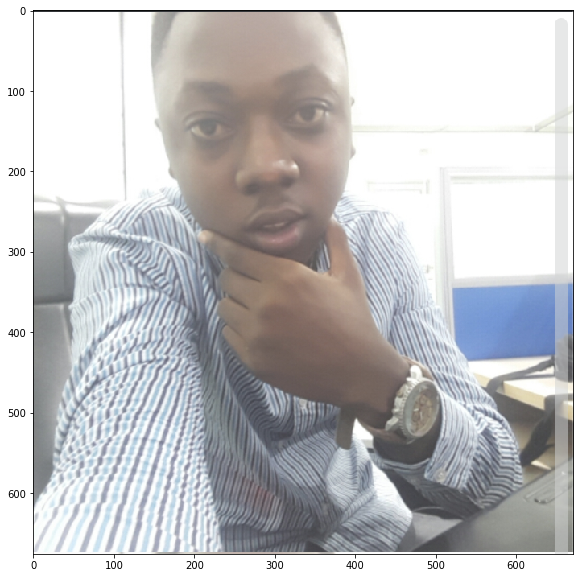

In [13]:
# display test_image
plt.figure(figsize=(10,10))
plt.imshow(test_image)

In [14]:
test_image_GRAY = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

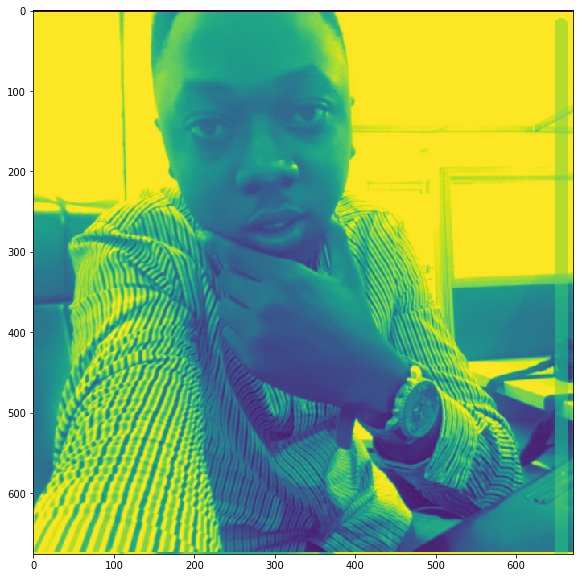

In [15]:
# display test_image
plt.figure(figsize=(10,10))
plt.imshow(test_image_GRAY)

In [16]:
num_down = 2
num_bilateral = 7

In [18]:
# downsample image using Gaussian pyramid
img_color = test_image
for _ in range(num_down):
    img_color = cv2.pyrDown(img_color)

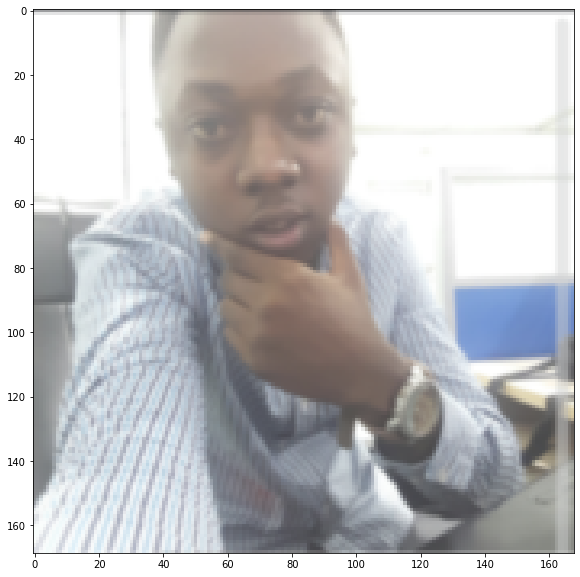

In [19]:
# display test_image
plt.figure(figsize=(10,10))
plt.imshow(img_color)

In [20]:
# repeatedly apply small bilateral filter instead of
# applying one large filter
for _ in range(num_bilateral):
    img_color = cv2.bilateralFilter(img_color, d=9,
                                    sigmaColor=9,
                                    sigmaSpace=7)

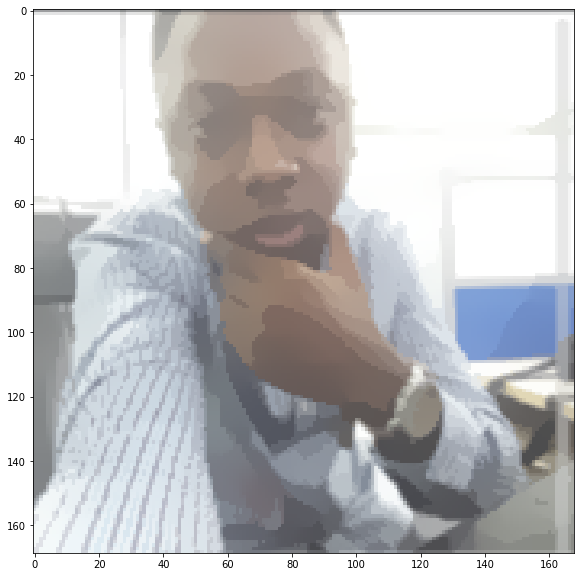

In [21]:
# display test_image
plt.figure(figsize=(10,10))
plt.imshow(img_color)

In [23]:
# upsample image to original size
for _ in range(num_down):
    img_color = cv2.pyrUp(img_color)

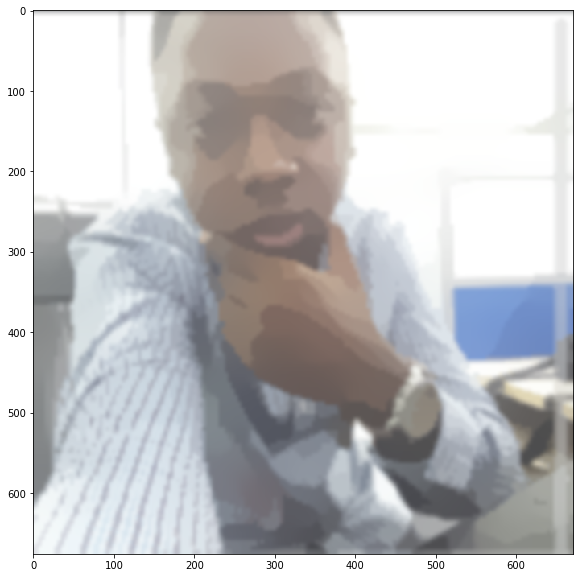

In [24]:
# display test_image
plt.figure(figsize=(10,10))
plt.imshow(img_color)

In [26]:
# convert to grayscale and apply median blur
img_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)
img_blur = cv2.medianBlur(img_gray, 7)

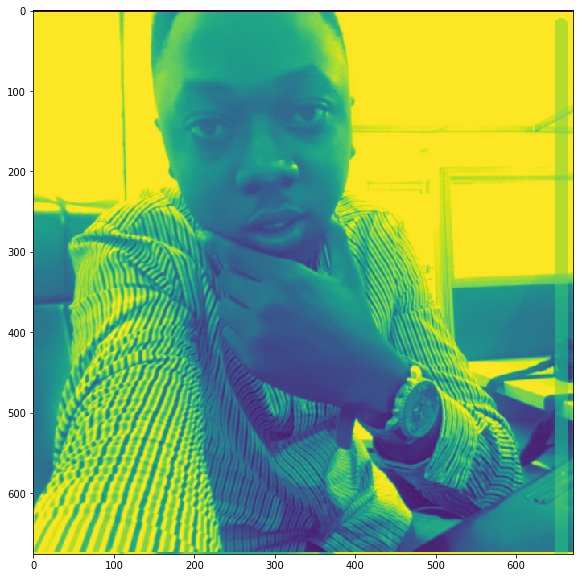

In [27]:
# display test_image
plt.figure(figsize=(10,10))
plt.imshow(img_gray)

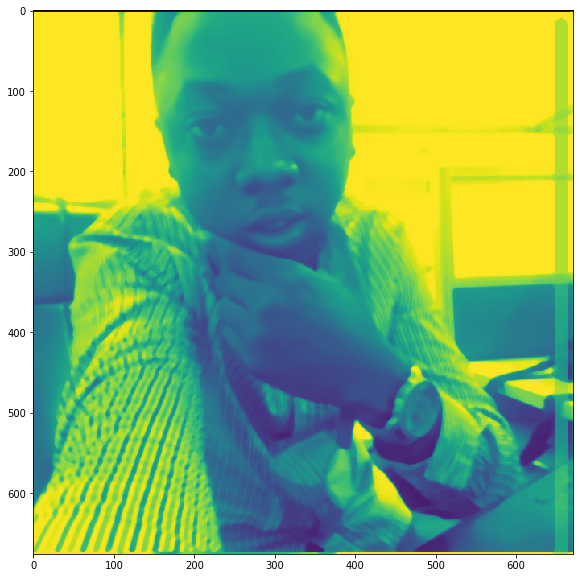

In [28]:
# display test_image
plt.figure(figsize=(10,10))
plt.imshow(img_blur)

In [34]:
# detect and enhance edges
img_edge = cv2.adaptiveThreshold(img_blur, 255,
                                 cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY,
                                 blockSize=9,
                                 C=0)

In [35]:
help(cv2.adaptiveThreshold)

Help on built-in function adaptiveThreshold:

adaptiveThreshold(...)
    adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst
    .   @brief Applies an adaptive threshold to an array.
    .   
    .   The function transforms a grayscale image to a binary image according to the formulae:
    .   -   **THRESH_BINARY**
    .       \f[dst(x,y) =  \fork{\texttt{maxValue}}{if \(src(x,y) > T(x,y)\)}{0}{otherwise}\f]
    .   -   **THRESH_BINARY_INV**
    .       \f[dst(x,y) =  \fork{0}{if \(src(x,y) > T(x,y)\)}{\texttt{maxValue}}{otherwise}\f]
    .   where \f$T(x,y)\f$ is a threshold calculated individually for each pixel (see adaptiveMethod parameter).
    .   
    .   The function can process the image in-place.
    .   
    .   @param src Source 8-bit single-channel image.
    .   @param dst Destination image of the same size and the same type as src.
    .   @param maxValue Non-zero value assigned to the pixels for which the condition is satisfied
  

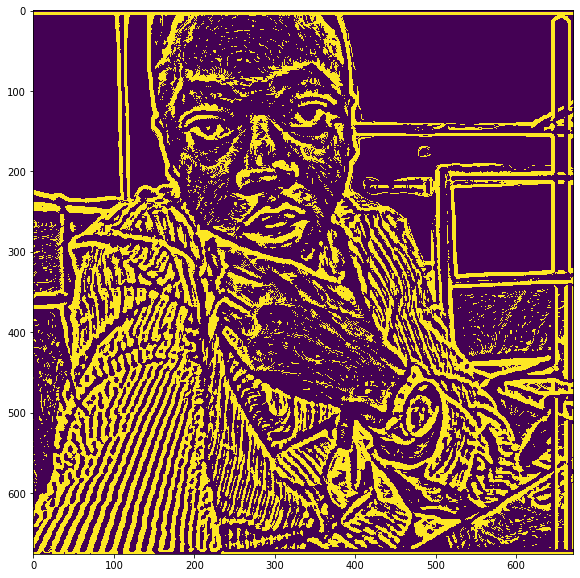

In [36]:
# display test_image
plt.figure(figsize=(10,10))
plt.imshow(img_edge)

In [37]:
# convert back to color, bit-AND with color image
img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
img_cartoon = cv2.bitwise_and(img_color, img_edge)
 
# display
cv2.imshow("cartoon", img_cartoon)

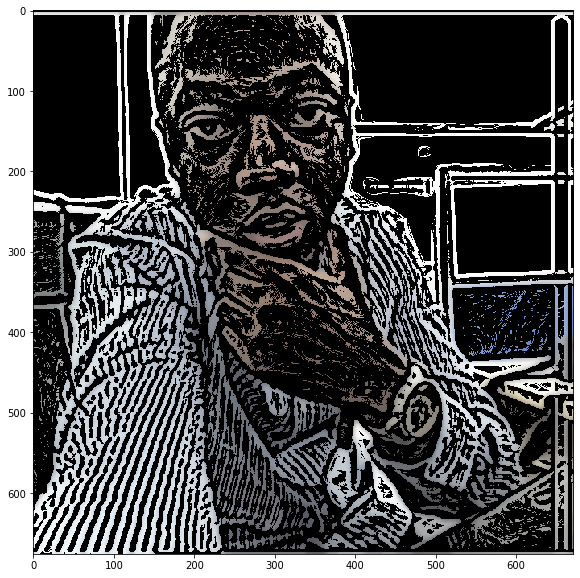

In [38]:
plt.figure(figsize=(10,10))
plt.imshow(img_cartoon)

In [43]:
# detect and enhance edges
img_edge = cv2.adaptiveThreshold(img_blur, 255,
                                 cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY,
                                 blockSize=9,
                                 C=2)

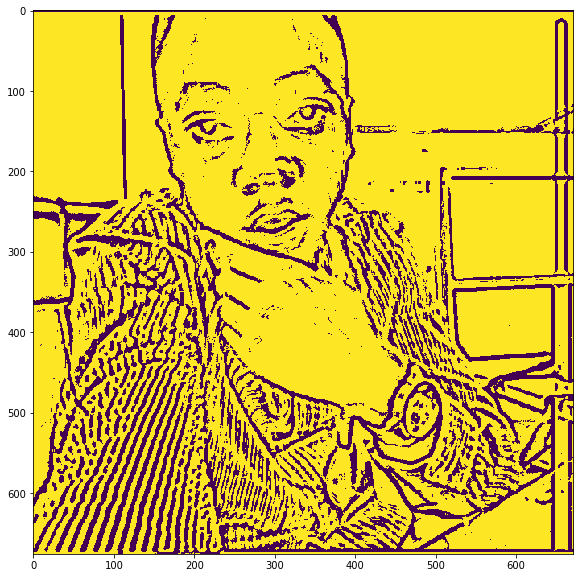

In [44]:
plt.figure(figsize=(10,10))
plt.imshow(img_edge)

In [45]:
# convert back to color, bit-AND with color image
img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
img_cartoon = cv2.bitwise_and(img_color, img_edge)
 
# display
cv2.imshow("cartoon", img_cartoon)

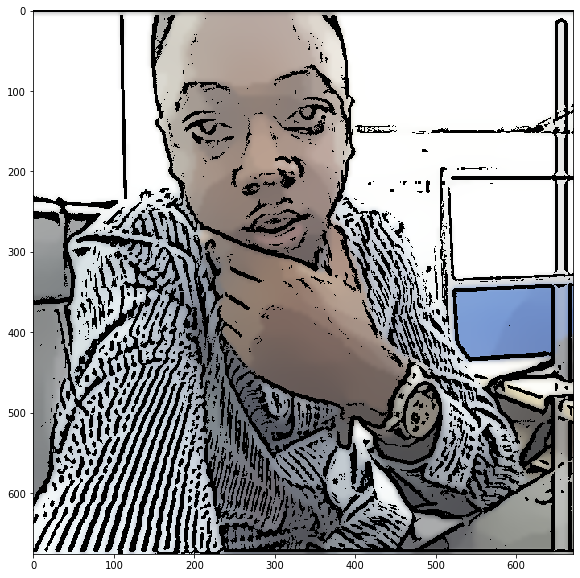

In [46]:
plt.figure(figsize=(10,10))
plt.imshow(img_cartoon)

In [51]:
# detect and enhance edges
img_edge = cv2.adaptiveThreshold(img_blur, 255,
                                 cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY,
                                 blockSize=9,
                                 C=-1)

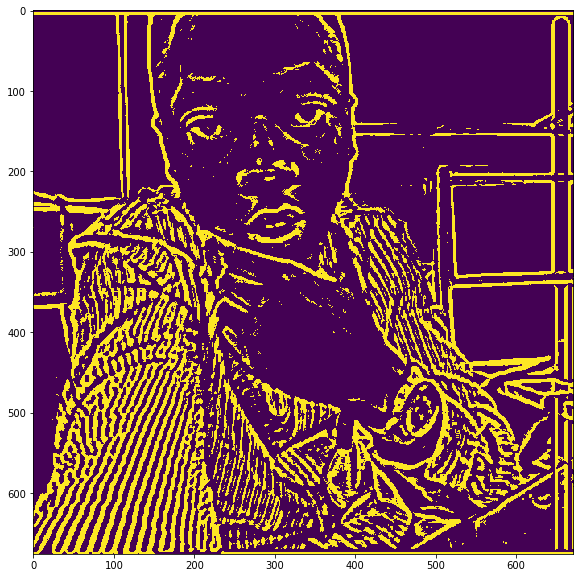

In [52]:
plt.figure(figsize=(10,10))
plt.imshow(img_edge)